In [1]:
import json
import time
from time import perf_counter

def ouvrir_json(chemin):
    f = open(chemin, encoding="utf-8")
    toto = json.load(f)
    f.close()
    return toto

def ecrire_json(chemin, contenu):
    w = open(chemin, "w", encoding="utf-8")
    w.write(json.dumps(contenu, indent=2, ensure_ascii=False))
    w.close()

In [2]:
import spacy
nlp_sm = spacy.load("fr_core_news_sm")
nlp_md = spacy.load("fr_core_news_md")
nlp_lg = spacy.load("fr_core_news_lg")

In [5]:
f1 = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/clean_data_echantillons/clean_parole_echantillon2.json")
f2 = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/Data/voc_glaff.json")

In [11]:
start1 =time.perf_counter()
loc_sm=[]
for texte in f1:
    try:
        doc = nlp_sm(texte)
        for entity in doc.ents:
            if entity.label_ =="LOC":
                loc_sm.append(entity.text)
    except:
        pass
end1 =time.perf_counter()
print("lieux trouvés par le modèle small : ",len(set(loc_sm)))
print(set(loc_sm))
print("temps :",end1-start1)
print()
print()
start4 =time.perf_counter()
tri_1 = [mot for mot in loc_sm if mot not in f2]
test1 = [mot for mot in loc_sm if mot in f2]
print("nombre lieux qui ne se trouvent pas dans le Glaff : ", len(set(tri_1)))
print(set(tri_1))
print()
print(set(test1))
print()

tri_2 = [mot for mot in tri_1 if mot.lower() not in f2]
test2 = [mot for mot in tri_1 if mot.lower() in f2]
print("nombre lieux en miniscules qui ne se trouvent pas dans le Glaff : ",len(set(tri_2)))
print(set(tri_2))
print()
print(set(test2))
print()



tri_3 =[mot for mot in tri_2 if mot.lower() not in tri_2] 
test3 =set(tri_2).difference(tri_3)
print("nombre de lieux obtenu dans la liste finale : ", len(set(tri_3)))
print(set(tri_3))
print()
print(set(test3))
end4 = time.perf_counter()
print("temps :",end4-start4)
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/clean_data_echantillons/lieux_echantillon2_aprésFiltrage_sm.json",tri_3)

lieux trouvés par le modèle small :  1901
{'Goose', 'Outro]. La-la-la', 'Saint-Pétersbourg', "Intro]. Bons baisers d'Mars", 'Aldo vole', 'Styles', 'Bravo', 'Morts', 'Togo', 'Tbilissi', 'Parisien Libéré', 'Calvi', 'Misogynie', 'Little', 'Noire', 'Belzebuth', 'Héloïse', 'Berlin', 'Intellectuelles', 'Reviendront', 'Déploie', 'Movie', 'Vosges', 'Parc des Princes', 'vieux Beaune', 'Saumur', 'Orang', 'Tokarev', 'Château Noir', 'Hollywood', 'Attention Lola', 'Nanana', 'État"].', 'Eden', 'Apprinds', 'Upon', 'Caché', 'Boom', 'Trap', 'l’Est', 'Cartouche', 'Personnes', 'from Rennes', 'VO', 'Atlantique', 'Unis', 'Babel', 'Planète Mars', 'Frigo', 'Avait', 'de Mélanie', 'Philistins', 'jardin des Tuileries', 'Pussycat', 'Philomène', 'Akhti', 'Chicanos', 'DJ Polo', 'Cocagne', 'Greenwitch Village', 'Gévaudan', 'la Rotonde', 'Rado', 'Papa', 'Finlande', 'Knicks', 'Coraje', 'Bière', 'L', 'Caire', 'Mourra', 'Vietnam', 'I', 'Bali', 'Connemara', 'Valence', 'Cheyenne', 'Élysées', 'Tonton', 'Auront', 'Pin', 'M

nombre lieux qui ne se trouvent pas dans le Glaff :  1831
{'Goose', 'Outro]. La-la-la', 'Saint-Pétersbourg', "Intro]. Bons baisers d'Mars", 'Aldo vole', 'Styles', 'Bravo', 'Morts', 'Togo', 'Tbilissi', 'Parisien Libéré', 'Calvi', 'Misogynie', 'Little', 'Belzebuth', 'Héloïse', 'Berlin', 'Intellectuelles', 'Reviendront', 'Déploie', 'Movie', 'Vosges', 'Parc des Princes', 'vieux Beaune', 'Saumur', 'Orang', 'Tokarev', 'Château Noir', 'Hollywood', 'Attention Lola', 'Nanana', 'État"].', 'Eden', 'Apprinds', 'Upon', 'Caché', 'Boom', 'Trap', 'l’Est', 'Cartouche', 'Personnes', 'from Rennes', 'Atlantique', 'Unis', 'Babel', 'Planète Mars', 'Frigo', 'Avait', 'de Mélanie', 'jardin des Tuileries', 'Pussycat', 'Philomène', 'Akhti', 'Chicanos', 'DJ Polo', 'Cocagne', 'Greenwitch Village', 'Gévaudan', 'la Rotonde', 'Rado', 'Papa', 'Finlande', 'Knicks', 'Coraje', 'Bière', 'Caire', 'Mourra', 'Vietnam', 'I', 'Bali', 'Connemara', 'Valence', 'Élysées', 'Tonton', 'Auront', 'Pin', 'Martigues', 'Rex', 'Île-de-Fran

nombre lieux en miniscules qui ne se trouvent pas dans le Glaff :  1108
{'Miners', 'Goose', 'Intro]. Celle', 'Outro]. La-la-la', 'C.I.P.', 'Saint-Pétersbourg', "Intro]. Bons baisers d'Mars", 'Ecoutez', 'Fresh', 'Prada', 'con!.', 'Créteil', 'Ouganda', 'Aldo vole', 'Pondichéry', 'Togo', 'Rico', 'Simca', 'Tbilissi', 'Parisien Libéré', 'Clichy', 'Alianza', 'Calvi', 'forêts', 'Little', 'Rue Saint-Vincent', 'Sévéso', 'Anvers', 'Belzebuth', "Lil' Bow Wow", 'Hallelujah', 'Héloïse', 'fin!.', 'Baumettes', 'Grand-Père', 'jean’', 'Bamako', 'Bruxelles', 'Movie', 'Vosges', 'Grand Pan', 'vieux Beaune', 'Saumur', 'Tipp', "pont d'Iena", 'Orang', 'Parc des Princes', 'Nante', 'Tokarev', 'Resistenza', 'Château Noir', 'Tic Tac', 'Hollywood', 'Attention Lola', 'Sumer', 'Saint-James', 'Nanana', 'État"].', 'Charon', 'Chhht', 'Eden', 'Recouvrance', 'Apprinds', 'Upon', 'Luberon', 'Hôtel de Russie', 'Eich', 'Trap', 'Pont – MC Solaar]. Passé', 'l’Est', 'MoMA', 'Géorgie', 'from Rennes', 'Blédina', 'Flaujo', 'Pada

In [1]:
print("pékin :",(0.277332495419421 + 0.800763790342241 + 0.0797561695660127)/3)
print("maroc :",(0 + 0 + 0)/3)
print("perpignon :",(0 + 0 + 0)/3)
print("bastille :",(4.05598774550903 + 12.9669136504283 + 4.08112319669287)/3)

pékin : 0.38595081844255824
maroc : 0.0
perpignon : 0.0
bastille : 7.034674864210065


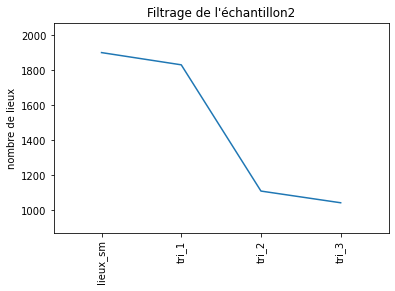

In [7]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1901, 1831, 1108, 1041]
labels = ['lieux_sm', 'tri_1', 'tri_2', 'tri_3']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.title("Filtrage de l'échantillon2")
plt.ylabel("nombre de lieux")
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [13]:
start2 =time.perf_counter()
loc_md=[]
for texte in f1:
    try:
        doc = nlp_md(texte)
        for entity in doc.ents:
            if entity.label_ =="LOC":
                loc_md.append(entity.text)
    except:
        pass
end2 =time.perf_counter()

print("lieux trouvés par le modèle medium : ",len(set(loc_md)))
print(set(loc_md))
print("temps :",end2-start2)
print()
print()
start5 =time.perf_counter()
tri_1 = [mot for mot in loc_md if mot not in f2]
test1 = [mot for mot in loc_md if mot in f2]
print("nombre lieux qui ne se trouvent pas dans le Glaff : ", len(set(tri_1)))
print(set(tri_1))
print()
print(set(test1))
print()

tri_2 = [mot for mot in tri_1 if mot.lower() not in f2]
test2 = [mot for mot in tri_1 if mot.lower() in f2]
print("nombre lieux en miniscules qui ne se trouvent pas dans le Glaff : ",len(set(tri_2)))
print(set(tri_2))
print()
print(set(test2))
print()



tri_3 =[mot for mot in tri_2 if mot.lower() not in tri_2] 
test3 =set(tri_2).difference(tri_3)
print("nombre de lieux obtenu dans la liste finale : ", len(set(tri_3)))
print(set(tri_3))
print()
print(set(test3))
end5 = time.perf_counter()
print("temps :",end5-start5)
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/clean_data_echantillons/lieux_echantillon2_aprésFiltrage_md.json",tri_3)

lieux trouvés par le modèle medium :  1424
{'Goose', 'Tombant', 'Saint-Pétersbourg', 'Greenwitch', 'Bravo', 'Togo', 'Tbilissi', 'Calvi', 'Noire', 'Berlin', 'Reviendront', 'Boy', 'Paisse', 'Parc des Princes', 'Huh', 'Saumur', 'Tokarev', 'Maire', 'Hollywood', 'État"].', 'Mini-Austin', 'Hasta', 'Eden', 'Vres', 'l’Est', "l'Eternel", 'Cartouche', 'Atlantique', 'Akhnaton].', 'Unis', 'Babel', 'Cartier', 'Planète Mars', 'Blaow', 'Freeman].', 'Philistins', "Sainte-Mad'lein’", 'jardin des Tuileries', 'Murmure].', 'Chicanos', 'Marchant', 'Cocagne', 'Gévaudan', 'la Rotonde', 'Mea Culpa!', 'Finlande', 'Nivea', 'Bière', 'L', 'Caire', 'Vietnam', 'Palpable', 'I', 'Bali', 'Connemara', 'Valence', 'Chtimis', 'Cheyenne', 'Élysées', 'Pin', 'Martigues', 'Tortillant', 'Lumière', 'Île-de-France', 'Moulin', 'Puces', 'Fort Greene', "méd'", 'Vancouver', 'Égyptiens', 'Enfernet', 'Fourche', "Croix d'Honneur", 'l´ai', 'Bondy', 'In', 'Indiens', 'Gange', 'Fredonne', 'Encastr?e', 'de France', 'Ficelles', 'ligne bleue 

nombre lieux qui ne se trouvent pas dans le Glaff :  1357
{'Goose', 'Tombant', 'Saint-Pétersbourg', 'Greenwitch', 'Bravo', 'Togo', 'Tbilissi', 'Calvi', 'Berlin', 'Reviendront', 'Boy', 'Paisse', 'Parc des Princes', 'Huh', 'Saumur', 'Tokarev', 'Maire', 'Hollywood', 'État"].', 'Mini-Austin', 'Hasta', 'Eden', 'Vres', 'l’Est', "l'Eternel", 'Cartouche', 'Atlantique', 'Akhnaton].', 'Unis', 'Babel', 'Cartier', 'Planète Mars', 'Blaow', 'Freeman].', "Sainte-Mad'lein’", 'jardin des Tuileries', 'Murmure].', 'Chicanos', 'Marchant', 'Cocagne', 'Gévaudan', 'la Rotonde', 'Mea Culpa!', 'Finlande', 'Nivea', 'Bière', 'Caire', 'Vietnam', 'Palpable', 'I', 'Bali', 'Connemara', 'Valence', 'Élysées', 'Pin', 'Martigues', 'Tortillant', 'Lumière', 'Île-de-France', 'Moulin', 'Puces', 'Fort Greene', "méd'", 'Vancouver', 'Enfernet', 'Fourche', "Croix d'Honneur", 'l´ai', 'Bondy', 'In', 'Fredonne', 'Gange', 'Encastr?e', 'de France', 'Ficelles', 'ligne bleue des Vosges', 'Microbe', 'le M.I.C.', "L'Italie", 'Vienne', '

nombre lieux en miniscules qui ne se trouvent pas dans le Glaff :  897
{'Goose', 'Peauaime', 'Saint-Pétersbourg', 'Créteil', 'Greenwitch', 'Ouganda', 'Pondichéry', 'Togo', 'Rico', 'Tbilissi', 'Alianza', 'Clichy', 'Terrestres', 'Journaliste].', 'Calvi', 'Rue Saint-Vincent', 'Sévéso', 'Ti', "Lil' Bow Wow", 'Nuttea].', "l'Elysée", 'Bamako', 'Bruxelles', 'Parc des Princes', 'Issa', 'Saumur', 'Huh', "pont d'Iena", 'Nante', 'Tokarev', 'Saint-James', 'Hollywood', 'Sumer', 'État"].', 'Clara', 'Mini-Austin', 'Hasta', 'Goudes', 'Métro Gaîté', 'Charon', 'Eden', 'Recouvrance', 'Hôtel de Russie', 'Eich', 'Vres', 'Brutalities', 'l’Est', "l'Eternel", 'Selecto', 'MoMA', 'Géorgie', 'Padam', 'Maine', 'Disney', 'Endoume', 'Akhnaton].', 'Kenzo', 'Babel', 'Alonz', 'B.H.V.', 'quartier Latin', 'Evêché !', 'Planète Mars', 'Blaow', 'Nam', 'Dù', 'Freeman].', 'Avignon', 'Danemark', 'Byzance', 'Raggasonic', 'California', "Sainte-Mad'lein’", 'Arabie', 'jardin des Tuileries', 'Murmure].', 'Asie', 'Bihac', 'Ardèche'

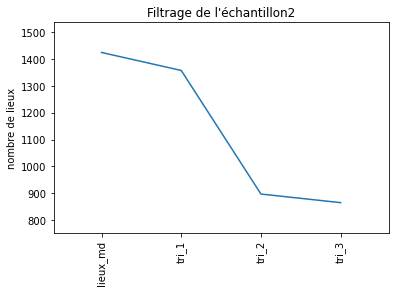

In [7]:
x = [1, 2, 3, 4]
y = [1424, 1357, 897, 865]
labels = ['lieux_md', 'tri_1', 'tri_2', 'tri_3']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.title("Filtrage de l'échantillon2")
plt.ylabel("nombre de lieux")
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [14]:
start3 =time.perf_counter()
loc_lg=[]
for texte in f1:
    try:
        doc = nlp_lg(texte)
        for entity in doc.ents:
            if entity.label_ =="LOC":
                loc_lg.append(entity.text)
    except:
        pass
end3 =time.perf_counter()
print("lieux trouvés par le modèle large : ",len(set(loc_lg)))
print(set(loc_lg))
print("temps :",end3-start3)
print()
print()
start6 =time.perf_counter()
tri_1 = [mot for mot in loc_lg if mot not in f2]
test1 = [mot for mot in loc_lg if mot in f2]
print("nombre lieux qui ne se trouvent pas dans le Glaff : ", len(set(tri_1)))
print(set(tri_1))
print()
print(set(test1))
print()

tri_2 = [mot for mot in tri_1 if mot.lower() not in f2]
test2 = [mot for mot in tri_1 if mot.lower() in f2]
print("nombre lieux en miniscules qui ne se trouvent pas dans le Glaff : ",len(set(tri_2)))
print(set(tri_2))
print()
print(set(test2))
print()



tri_3 =[mot for mot in tri_2 if mot.lower() not in tri_2] 
test3 =set(tri_2).difference(tri_3)
print("nombre de lieux obtenu dans la liste finale : ", len(set(tri_3)))
print(set(tri_3))
print()
print(set(test3))
end6 = time.perf_counter()
print("temps :",end6-start6)
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/clean_data_echantillons/lieux_echantillon2_aprésFiltrage_lg.json",tri_3)

lieux trouvés par le modèle large :  1413
{'Goose', 'Tombant', 'Saint-Pétersbourg', 'Bougival', 'CV', 'Togo', 'Morts', 'Tbilissi', 'Calvi', 'Noire', 'Berlin', 'Reviendront', "Brill'", 'Parc des Princes', 'Saumur', 'Orang', 'Château Noir', 'Hollywood', 'Vres', 'rue Blondel', 'Atlantique', 'Montfavet !', 'Unis', 'Babel', 'Saint-Bernard', 'Planète Mars', 'Blaow', "I'", 'Philistins', "Sainte-Mad'lein’", 'jardin des Tuileries', 'Pussycat', 'Deviendront', 'Chicanos', 'Cocagne', 'Greenwitch Village', 'Mière Parisienne', 'Gévaudan', 'la Rotonde', 'Finlande', 'Bière', 'Caire', 'Mourra', 'Vietnam', 'Palpable', 'I', 'Bali', 'Connemara', 'Valence', 'Élysées', 'Pin', 'Martigues', 'Tortillant', 'Rex', 'Como yo', 'Île-de-France', 'Tchikipaw', 'Moulin', 'Puces', 'Fort Greene', 'B.I.E.M.', 'Horloge', 'Vancouver', 'Égyptiens', 'Enfernet', 'Sublime Porte', 'Yeah!.', 'Fourche', 'Faubourg-Saint-Honoré', 'Bâillonné', 'Bondy', 'Canal', 'Tonnerr', 'Lendemain', 'In', 'Indiens', 'Gange', 'Fredonne', 'Encastr?e'

nombre lieux qui ne se trouvent pas dans le Glaff :  1349
{'Goose', 'Tombant', 'Saint-Pétersbourg', 'Bougival', 'Togo', 'Morts', 'Tbilissi', 'Calvi', 'Berlin', 'Reviendront', "Brill'", 'Parc des Princes', 'Saumur', 'Orang', 'Château Noir', 'Hollywood', 'Vres', 'rue Blondel', 'Atlantique', 'Montfavet !', 'Unis', 'Babel', 'Saint-Bernard', 'Planète Mars', 'Blaow', "I'", "Sainte-Mad'lein’", 'jardin des Tuileries', 'Pussycat', 'Deviendront', 'Chicanos', 'Cocagne', 'Greenwitch Village', 'Mière Parisienne', 'Gévaudan', 'la Rotonde', 'Finlande', 'Bière', 'Caire', 'Mourra', 'Vietnam', 'Palpable', 'I', 'Bali', 'Connemara', 'Valence', 'Élysées', 'Pin', 'Martigues', 'Tortillant', 'Rex', 'Como yo', 'Île-de-France', 'Tchikipaw', 'Moulin', 'Puces', 'Fort Greene', 'B.I.E.M.', 'Horloge', 'Vancouver', 'Enfernet', 'Sublime Porte', 'Yeah!.', 'Fourche', 'Faubourg-Saint-Honoré', 'Bâillonné', 'Bondy', 'Canal', 'Tonnerr', 'Lendemain', 'In', 'Fredonne', 'Gange', 'Encastr?e', 'de France', 'Bancs', 'Ficelles', '

nombre lieux en miniscules qui ne se trouvent pas dans le Glaff :  881
{'Goose', 'C.I.P.', 'Saint-Pétersbourg', 'Fresh', 'Créteil', 'Bougival', 'Ouganda', 'Pondichéry', 'Togo', 'Tbilissi', 'Clichy', 'Terrestres', 'Calvi', 'Rue Saint-Vincent', 'Sévéso', "Lil' Bow Wow", 'Nuttea].', "Brill'", 'Bamako', 'Bruxelles', 'Parc des Princes', 'Grand Pan', 'Tipp', 'Saumur', "All'", "pont d'Iena", 'Orang', 'Nante', 'Saât', 'Château Noir', 'Saint-James', 'Hollywood', 'Sumer', 'Été 77', 'Oural', 'Goudes', 'Est Flora', 'Charon', 'Farang', 'Recouvrance', 'Hôtel de Russie', 'Eich', 'Vres', 'rue Blondel', 'Lololala', 'Garde-à-vue', 'bande du', 'Selecto', 'MoMA', 'Géorgie', 'porte des Lilas', 'Blédina', 'Flaujo', 'Padam', 'Maine', 'Montfavet !', 'Endoume', 'Protège-terrain', 'Babel', 'B.H.V.', 'Saint-Bernard', 'quartier Latin', 'Planète Mars', 'Blaow', 'Probabl', 'Dù', 'Tr', 'Rimplachant', 'Avignon', 'Danemark', 'Byzance', "I'", "Sainte-Mad'lein’", 'Arabie', 'jardin des Tuileries', 'Pussycat', 'Asie', 'Ma

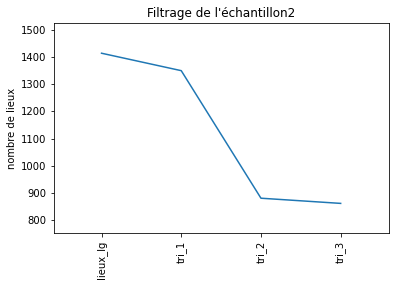

In [10]:
x = [1, 2, 3, 4]
y = [1413, 1349, 881, 862]
labels = ['lieux_lg', 'tri_1', 'tri_2', 'tri_3']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.title("Filtrage de l'échantillon2")
plt.ylabel("nombre de lieux")
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()